In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

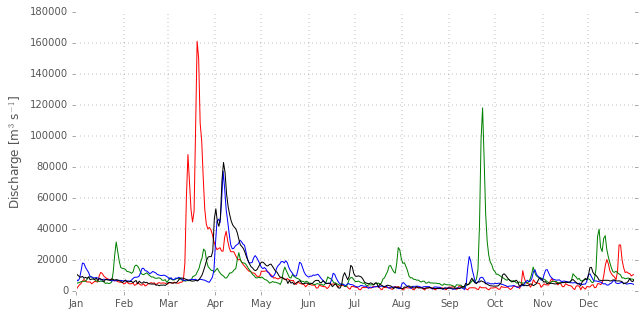

In [129]:
f = open('./data/merrimack_discharge.dat','r')
f.seek(0)

dates_list = []
discharge = []
merrimack_river = {} 
for line in f.readlines():
    data = line.split('\t')
    if data[0] == 'USGS':
        i_date = data[2].split('-')
        year = int(i_date[0])
        month = int(i_date[1])
        day = int(i_date[2])
        if year not in merrimack_river.keys():
            merrimack_river[year] = dict()
            merrimack_river[year]['dates'] = []
            merrimack_river[year]['discharge'] = []
        merrimack_river[year]['dates'].append(date(year, month, day))
        merrimack_river[year]['discharge'].append(float(data[3]))
        #dates_list.append(datetime.strptime(data[2],'%Y-%m-%d'))


import matplotlib.dates
fig = plt.figure(figsize=(10, 5),frameon=True)
ax1 = fig.add_subplot(111,axisbg='w',frameon=True)


ax1.plot(merrimack_river[1936]['dates'], merrimack_river[1936]['discharge'], 'r', ms=5)
ax2 = ax1.twiny()
ax2.plot(merrimack_river[1938]['dates'], merrimack_river[1938]['discharge'], 'g', ms=5)
ax3 = ax1.twiny()
ax3.plot(merrimack_river[1960]['dates'], merrimack_river[1960]['discharge'], 'b', ms=5)
ax4 = ax1.twiny()
ax4.plot(merrimack_river[1987]['dates'], merrimack_river[1987]['discharge'], 'k', ms=5)

ax2.set_xticks([])
ax3.set_xticks([])
ax4.set_xticks([])

#ax1.axis('on')

ax1.grid(True, color='k', linestyle=':', linewidth=0.25)
# labels
#ax.set_xlabel('Times')
ax1.set_ylabel(r'Discharge [m$^3$ s$^{-1}$]')
#ax.set_yticks([0, 100000, 200000])             #change fee to meter!!!
# Fix the formatting of the dates since ugly
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))


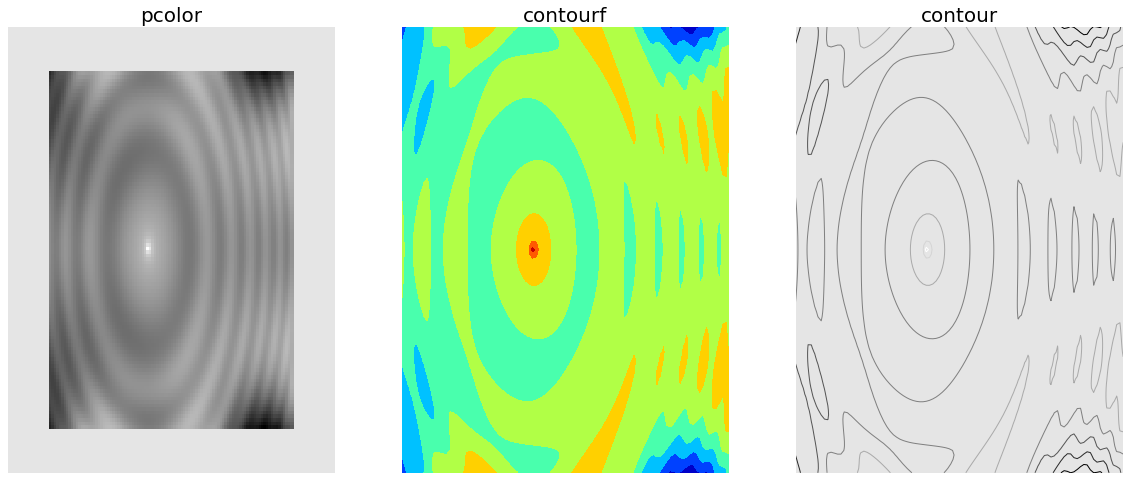

In [130]:
X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
   + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1, 3, 1)
ax1.pcolor(X, Y, Z, cmap='gray')  # use the gray colormap to look more realistic
ax1.set_xticks([])  # turn off ticks since they don't help us here
ax1.set_yticks([])
ax1.set_title('pcolor', fontsize=20)

ax2 = fig.add_subplot(1, 3, 2)
ax2.contourf(X, Y, Z, cmap='jet')  # use the gray colormap to look more realistic
ax2.set_xticks([])  # turn off ticks since they don't help us here
ax2.set_yticks([])
ax2.set_title('contourf', fontsize=20)


ax3 = fig.add_subplot(1, 3, 3)
ax3.contour(X, Y, Z, cmap='gray')  # use the gray colormap to look more realistic
ax3.set_xticks([])  # turn off ticks since they don't help us here
ax3.set_yticks([])
ax3.set_title('contour', fontsize=20)

In [131]:
import pandas as pd

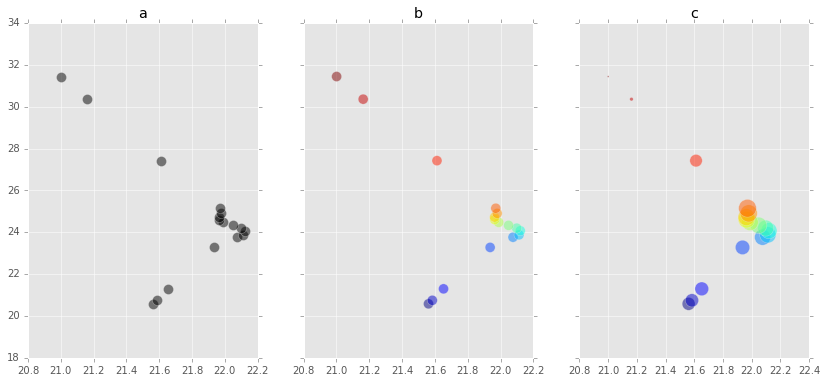

In [132]:
import glob
class dataclass:
    def __init__(self,filename):
        self.name = filename
        temp = []
        salt = []
        dep = []
        tran = []
        with open(self.name) as f:
            for line in f:
                #print(line.split())
                spline = line.split()
                if '*END*' in spline:
                    break
            for line in f:
                spline = line.split()
                dep.append(float(spline[1]))
                temp.append(float(spline[2]))
                salt.append(float(spline[5]))
                tran.append(float(spline[9]))
        self.depth = dep
        self.temperature = temp
        self.salinity = salt
        self.transmission = tran
    def salt_mean(self):
        return np.mean(self.salinity)
    def temp_max(self):
        return np.max(self.temperature)

def show():

    file_list = glob.glob('./MCH/m1001a.cnv2')
    wind = []
    for file in file_list:
        wind.append(dataclass(file))
    #show wind salt_mean() temp_max()
    for w in wind:
        x = w.temperature
        y = w.salinity
        colors = w.depth/np.max(w.depth)
        area = 100*np.pi * (15*w.transmission/np.max(w.transmission))**2  # 0 to 15 point radiuses
        fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14,6))
        axes[0].scatter(x, y, s=100, c='black', alpha=0.5)
        axes[0].set_title('a')
        axes[1].scatter(x, y, s=100, c=colors, alpha=0.5)
        axes[1].set_title('b')
        axes[2].scatter(x, y, s=area, c=colors, alpha=0.5)
        axes[2].set_title('c')
show()




In [133]:
burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
wind_speed = burl[:, 6]

ValueError: Some errors were detected !
    Line #3 (got 4 columns instead of 1)
    Line #5 (got 12 columns instead of 1)
    Line #6 (got 3 columns instead of 1)
    Line #7 (got 3 columns instead of 1)
    Line #11 (got 2 columns instead of 1)
    Line #13 (got 9 columns instead of 1)
    Line #14 (got 3 columns instead of 1)
    Line #16 (got 2 columns instead of 1)
    Line #19 (got 2 columns instead of 1)
    Line #22 (got 2 columns instead of 1)
    Line #30 (got 2 columns instead of 1)
    Line #31 (got 6 columns instead of 1)
    Line #32 (got 5 columns instead of 1)
    Line #33 (got 2 columns instead of 1)
    Line #35 (got 8 columns instead of 1)
    Line #36 (got 5 columns instead of 1)
    Line #37 (got 3 columns instead of 1)
    Line #41 (got 3 columns instead of 1)
    Line #44 (got 6 columns instead of 1)
    Line #45 (got 2 columns instead of 1)
    Line #46 (got 5 columns instead of 1)
    Line #49 (got 3 columns instead of 1)
    Line #57 (got 7 columns instead of 1)
    Line #59 (got 5 columns instead of 1)
    Line #60 (got 2 columns instead of 1)
    Line #61 (got 3 columns instead of 1)
    Line #62 (got 3 columns instead of 1)
    Line #64 (got 3 columns instead of 1)
    Line #66 (got 2 columns instead of 1)
    Line #68 (got 7 columns instead of 1)
    Line #70 (got 3 columns instead of 1)
    Line #71 (got 4 columns instead of 1)
    Line #72 (got 3 columns instead of 1)
    Line #76 (got 2 columns instead of 1)
    Line #79 (got 2 columns instead of 1)
    Line #80 (got 5 columns instead of 1)
    Line #81 (got 6 columns instead of 1)
    Line #84 (got 3 columns instead of 1)
    Line #86 (got 2 columns instead of 1)
    Line #87 (got 3 columns instead of 1)
    Line #89 (got 16 columns instead of 1)
    Line #91 (got 6 columns instead of 1)
    Line #105 (got 4 columns instead of 1)
    Line #106 (got 4 columns instead of 1)
    Line #107 (got 4 columns instead of 1)
    Line #108 (got 4 columns instead of 1)
    Line #109 (got 4 columns instead of 1)
    Line #110 (got 4 columns instead of 1)

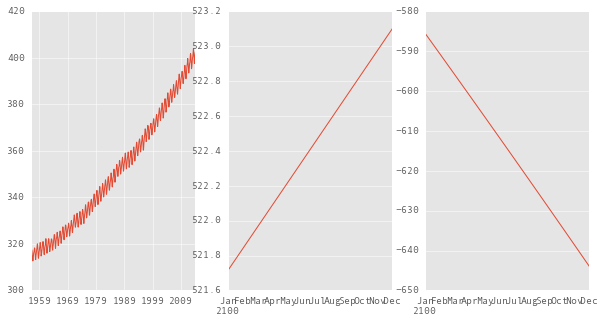

In [152]:
import scipy.optimize as optimization
mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
years = mauna_loa_co2[:, 0]
months = mauna_loa_co2[:, 1]
co2 = mauna_loa_co2[:, 4]

def func1(x, a, b):
    return a + b*x

def func2(x, a, b, c):
    return a + b*x + c*x*x

def func5(x, a, b, c, d, e, f):
    return a + b*x + c*x*x + d*x**3 + e*x**4 + f*x**5


ts_co2=pd.Series(np.array(co2),pd.period_range(str(int(years[0]))+'-'
                                            + str(int(months[0])) +'-'+ '1', periods=len(years), freq='M'))

para1=np.array([0.0, 0.0])
x = [int(years[i] - years[0])*12 + int(months[i] - months[0]) for i in range(len(years))]
beta1, stdv1 = optimization.curve_fit(func1, x, co2, para1)

para2=np.array([0.0, 0.0,0.0])
beta2, stdv2 = optimization.curve_fit(func2, x, co2, para2)

para5=np.array([0.0, 0.0,0.0, 0.0, 0.0, 0.0])
beta5, stdv5 = optimization.curve_fit(func5, x, co2, para5)

x1 = np.array(x)

y1 =beta1[0] + beta1[1]*x1
y2 =beta2[0] + beta2[1]*x1 + beta2[2]*x1**2
y5 =beta5[0] + beta5[1]*x1 + beta5[2]*x1**2 + beta5[3]*x1**3 + beta5[4]*x1**4 + beta5[5]*x1**5

fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,3,1)
test=pd.Series(co2[:],pd.period_range('3/1/1956', periods=len(co2), freq='M'))

test.plot()

predictor =[(2100-int(years[0]))*12 + (m - int(months[0])) for m in range(1,13)]
response1 = func1(np.array(predictor),beta1[0],beta1[1]) 
response2 = func2(np.array(predictor),beta2[0],beta2[1],beta2[2]) 
response5 = func5(np.array(predictor),beta5[0],beta5[1],beta5[2],beta5[3],beta5[4],beta5[5]) 
p=pd.period_range('1/1/2100', periods=12, freq='M')
ts1=pd.Series(response1,p)
ts2=pd.Series(response2,p)
ts5=pd.Series(response5,p)
fig.add_subplot(1,3,2)
ts1.plot()
fig.add_subplot(1,3,3)
ts5.plot()

In [138]:
from datetime import datetime
now = datetime.now()
stamp = datetime(2011, 1, 3)
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [ ]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator
plt.style.use('ggplot')

def plot(df, filename, heading=None):

    fig, ax = plt.subplots(figsize=(8, 4))

    min_date = None
    max_date = None
    for col_name in df.columns.values:

        # plot the column
        col = df[col_name]
        col = col[col.notnull()] # drop NAs
        dates = [zzz.to_timestamp().date() for zzz in col.index]
        ax.plot_date(x=dates, y=col, fmt='-', label=col_name,
            tz=None, xdate=True, ydate=False, linewidth=1.5)

        # establish the date range for the data
        if min_date:
            min_date = min(min_date, min(dates))
        else:
            min_date = min(dates)
        if max_date:
            max_date = max(max_date, max(dates))
        else:
            max_date = max(dates)

    # give a bit of space at each end of the plot - aesthetics
    span = max_date - min_date
    extra = int(span.days * 0.03) * datetime.timedelta(days=1)
    ax.set_xlim([min_date - extra, max_date + extra])

    # format the x tick marks
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    ax.xaxis.set_minor_formatter(DateFormatter('\n%b'))
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator(bymonthday=1, interval=2))

    # grid, legend and yLabel
    ax.grid(True)
    ax.legend(loc='best', prop={'size':'x-small'})
    ax.set_ylabel('Percent')

    # heading
    if heading:
        fig.suptitle(heading, fontsize=12)
    fig.tight_layout(pad=1.5)

    # footnote
    fig.text(0.99, 0.01, 'marktheballot.blogspot.com.au', ha='right', 
        va='bottom', fontsize=8, color='#999999')

    # save to file
    fig.savefig(filename, dpi=125)